In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [4]:
train.head(5)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [5]:
train.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [6]:
train.shape, test.shape

((89197, 10), (11121, 9))

In [7]:
train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [8]:
train.nunique()

row_id              89197
user_id             27734
category_id            47
video_id              175
age                    58
gender                  2
profession              3
followers              17
views                  43
engagement_score      229
dtype: int64

# Feature Engineering

Fortunately this data set doesnt have any missing data. So we dont really need to worry about it.
We can concentrate on finding outliers and converting object column data type to integer data type column

We can do this either by giving some integer values to text with the help of labelEncoder or create new columns for each values (OneHotEncoding) with the help of get_dummies. I could have used oneHotEncoding as well, but both train and test have same values. So I will go ahead with get_dummies. 

In [9]:
test.gender.value_counts()

Male      6377
Female    4744
Name: gender, dtype: int64

In [5]:
gender_df = pd.get_dummies(train.gender, prefix='gender')
train = pd.concat([train, gender_df], axis=1)

In [6]:
test.profession.value_counts()

Student                 5572
Other                   3366
Working Professional    2183
Name: profession, dtype: int64

In [7]:
profession_df = pd.get_dummies(train.profession, prefix='profession')
train = pd.concat([train, profession_df], axis=1)

In [8]:
train.head(5)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,1,19990,37,128,24,Male,Student,180,1000,4.33,0,1,0,1,0
1,2,5304,32,132,14,Female,Student,330,714,1.79,1,0,0,1,0
2,3,1840,12,24,19,Male,Student,180,138,4.35,0,1,0,1,0
3,4,12597,23,112,19,Male,Student,220,613,3.77,0,1,0,1,0
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13,0,1,0,0,1


In [9]:
gender_df = pd.get_dummies(test.gender, prefix='gender')
test = pd.concat([test, gender_df], axis=1)

profession_df = pd.get_dummies(test.profession, prefix='profession')
test = pd.concat([test, profession_df], axis=1)

test = test.drop(['gender','profession'], axis=1)

In [10]:
test.head(5)

,row_id,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,89198,7986,12,42,14,180,138,0,1,0,1,0
1,89199,11278,34,115,14,230,840,0,1,0,1,0
2,89200,17245,8,110,44,280,628,1,0,0,0,1
3,89201,9851,16,137,18,270,462,0,1,0,1,0
4,89202,16008,34,96,47,230,840,1,0,1,0,0


# Data Visualization

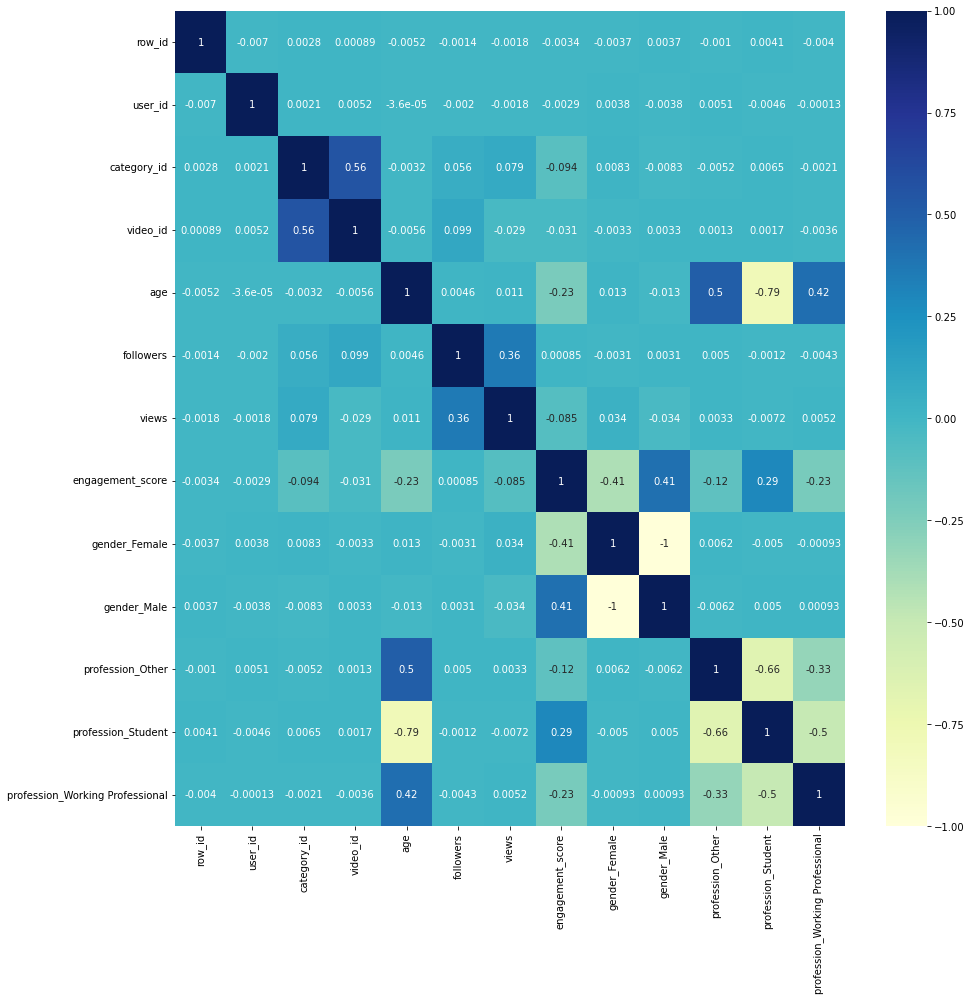

In [16]:
plt.figure(figsize=(15,15))
g=sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='gender', ylabel='engagement_score'>

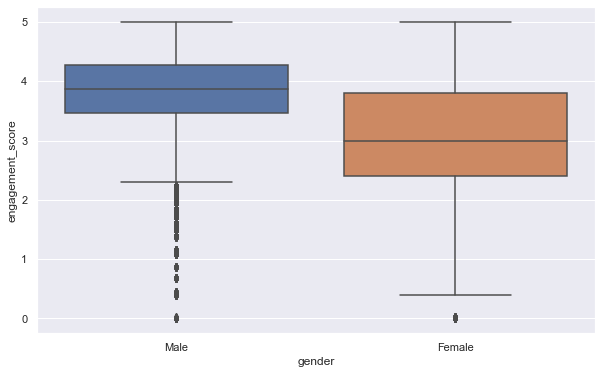

In [17]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x='gender', y='engagement_score', data=train)

<AxesSubplot:xlabel='profession', ylabel='engagement_score'>

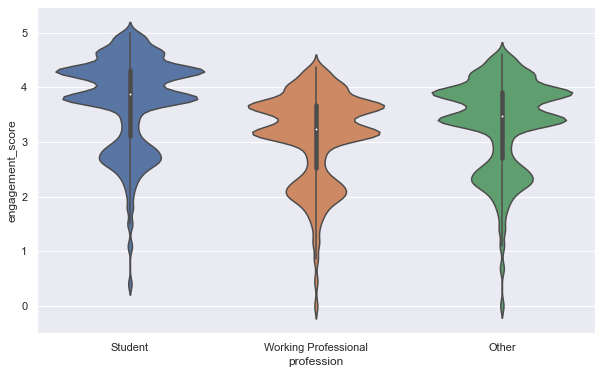

In [18]:
sns.set(rc={'figure.figsize':(10,6)})
sns.violinplot(x='profession', y='engagement_score', data=train)

<AxesSubplot:xlabel='age', ylabel='Count'>

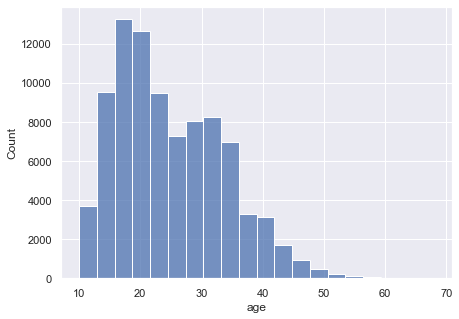

In [19]:
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(x='age',  data=train, bins=20)

In [56]:
Most of users are in range of 15-25 years.

SyntaxError: invalid syntax (Temp/ipykernel_28892/276833840.py, line 1)

<AxesSubplot:xlabel='followers', ylabel='Count'>

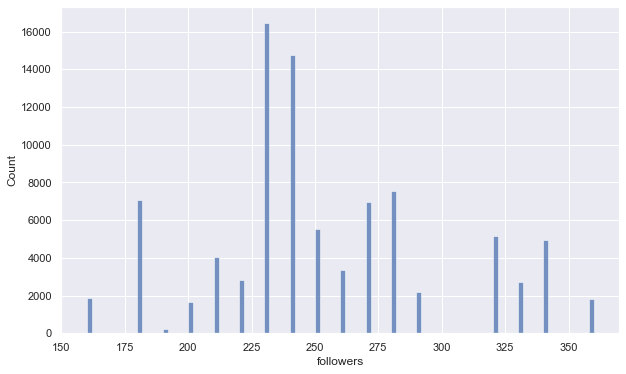

In [20]:
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(x='followers', data=train, bins=100)

Most of the followers are in range of 225-250.

<AxesSubplot:xlabel='category_id', ylabel='Density'>

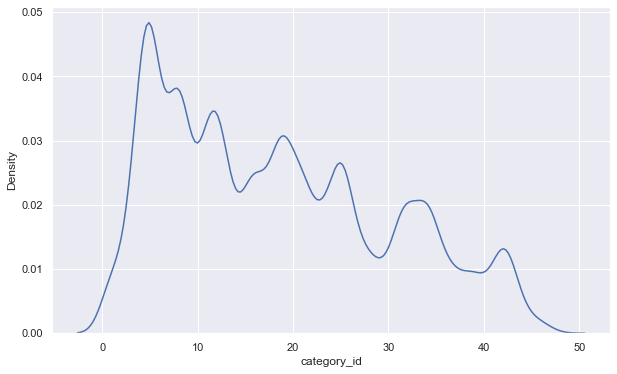

In [21]:
sns.set(rc={'figure.figsize':(10,6)})
sns.kdeplot(x='category_id', data=train)

<AxesSubplot:xlabel='profession', ylabel='count'>

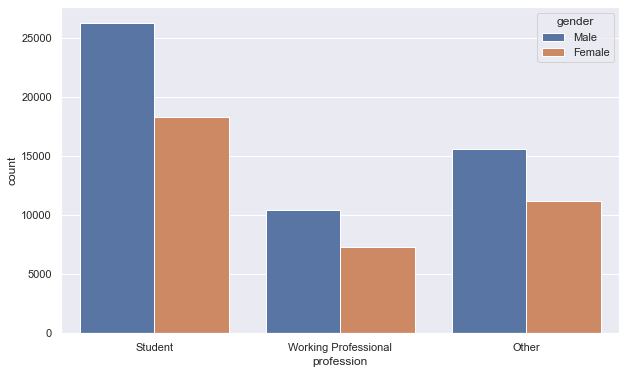

In [22]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x='profession',hue="gender", data=train)

<AxesSubplot:xlabel='engagement_score', ylabel='views'>

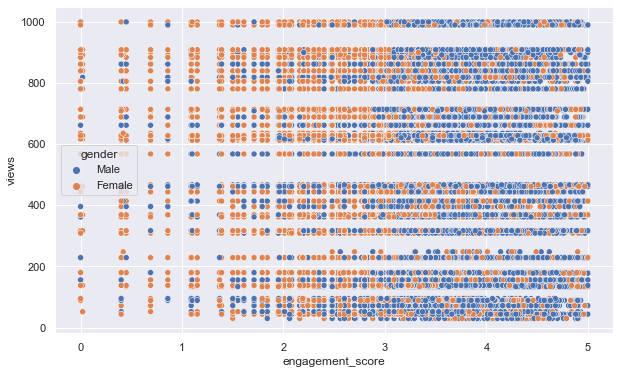

In [23]:
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(y='views',x='engagement_score',hue="gender", data=train)

This graph is helping us to find engagement score for Female is mostly below 3 and for Males its more than 3, when we caompre it with views (Except for views close to 500) 

<AxesSubplot:xlabel='engagement_score', ylabel='views'>

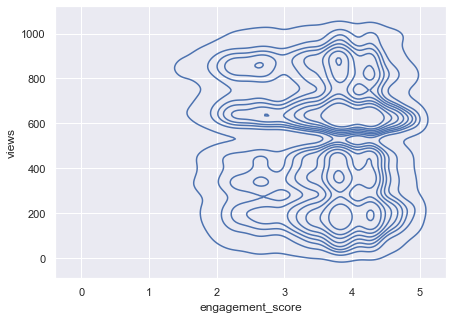

In [24]:
sns.set(rc={'figure.figsize':(7,5)})
sns.kdeplot(y='views',x='engagement_score' , data=train)

<AxesSubplot:xlabel='views', ylabel='engagement_score'>

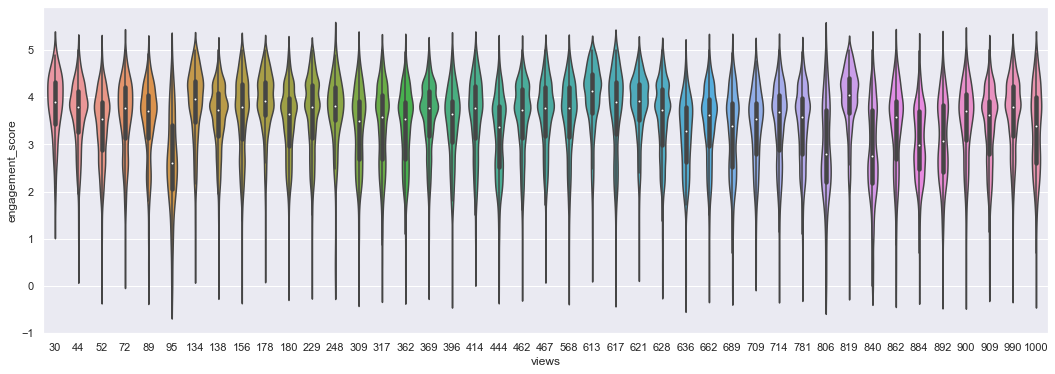

In [25]:
sns.set(rc={'figure.figsize':(18,6)})
sns.violinplot(x='views', y='engagement_score', data=train)

Row ID is just one up number in the table, so we can remove it. But test Row ID will be required later, so saving it.

In [11]:
test_row_id = test['row_id']
train = train.drop(['row_id'], axis=1)
test = test.drop(['row_id'], axis=1)

In [12]:
train = train.drop(['gender','profession'], axis=1)

In [ ]:
#train = train.drop(['user_id','followers','row_id'], axis=1)
#test = test.drop(['user_id','followers','row_id'], axis=1)

#train = train.drop(['gender_Female','profession_Student'], axis=1)
#test = test.drop(['gender_Female','profession_Student'], axis=1)

Before testing it on actual test data, we can try validating with the help cross validation technique

In [24]:
from sklearn.model_selection import train_test_split

X =  train.drop("engagement_score", axis=1)
Y  = train["engagement_score"]

# split into train test sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1)

In [25]:
X_test  = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((80277, 11), (80277,), (11121, 11))

# Model training and fine tunning

I will be trying 3 algorithms,
1. XGB Regressor
2. Random Forest Regressor
3. Lasso Regression
We will do parameter fine tunning for the above algorithm

In [16]:
from sklearn.model_selection import GridSearchCV  #For paramter fine tuning
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb #For XGB Regressor
from xgboost import plot_tree

from sklearn.ensemble import RandomForestRegressor #For Random Forest Regressor
from sklearn.datasets import make_regression

from sklearn.metrics import r2_score #For calculating R2 score

from sklearn import linear_model #For Lasso Regression

**XGB Alogrithm**

In [ ]:
xgb_model = xgb.XGBRegressor()

#create the grid
grid = {'max_depth': [3,4,5,6],
        'n_estimators':[100, 200, 300],
        'learning_rate': [0.05,0.1, 0.2,0.3,0.4,0.5],
        'subsample': [0.4,0.45, 0.5,0.55],
        'colsample_bytree':[0.4,0.45, 0.5,0.55],
        'gamma':[i/10.0 for i in range(0,5)]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = xgb_model, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(X_train, Y_train)

#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

In [21]:
model = xgb.XGBRegressor(base_score=0.5, learning_rate=0.05, n_estimators=100,subsample =0.5, max_depth=7,gamma=0.3).fit(X_train, Y_train)

In [22]:
y_pred_val = model.predict(X_val)

In [23]:
r2_score(Y_val, y_pred_val)

0.35812545654984485

**Random Forest Regressor**

In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

In [ ]:
rf_random.best_params_

In [26]:
model = RandomForestRegressor(n_estimators=800, min_samples_split= 10, min_samples_leaf= 4, max_features='sqrt', max_depth=50, bootstrap=True)

In [27]:
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [28]:
y_pred_val =model.predict(X_val)

In [29]:
r2_score(Y_val, y_pred_val)

0.37329768512790773

# Lasso Regression

In [52]:
# Fit regression model
model = linear_model.Lasso(alpha=0.005)

In [53]:
model.fit(X_train, Y_train)

Lasso(alpha=0.005)

In [54]:
y_pred_val =model.predict(X_val)

In [55]:
r2_score(Y_val, y_pred_val)

0.26976107316149256

# Saving Prediction to file

In [30]:
y_pred_val =model.predict(X_test)

In [31]:
#Create a  DataFrame with the passengers ids and our prediction
submission = pd.DataFrame({'row_id':test_row_id,'engagement_score':y_pred_val})

In [32]:
submission.head(5)

,row_id,engagement_score
0,89198,4.071088
1,89199,3.505686
2,89200,2.724401
3,89201,4.038683
4,89202,2.064053


In [33]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = './engagement_score.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: ./engagement_score.csv
